# 1. Business Understanding

Dengan harga rumah yang meningkat rata-rata 8% per tahun, lebih tinggi dari rata-rata nasional yang hanya sekitar 6%, calon pembeli dan investor sering kali menghadapi kesulitan dalam menentukan nilai wajar dari properti. Ketidakpastian ini dapat mengakibatkan keputusan investasi yang tidak tepat, yang pada gilirannya dapat mempengaruhi stabilitas pasar dan aksesibilitas perumahan bagi masyarakat.

Saat ini, banyak informasi mengenai harga rumah yang tidak tersedia secara terbuka, sehingga calon pembeli dan investor kesulitan dalam membuat keputusan yang informasi. Dengan menyediakan data yang dapat diandalkan dan analisis yang mendalam tentang faktor-faktor yang memengaruhi harga rumah, proyek ini diharapkan dapat membantu menciptakan lingkungan pasar yang lebih transparan. Hal ini tidak hanya akan memberikan kepercayaan kepada pembeli tetapi juga mendorong pengembang untuk beroperasi dengan lebih etis dan bertanggung jawab.

# 2. Importing Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
%matplotlib inline
import seaborn as sns

# 3. Data Loading

In [ ]:
data = pd.read_csv('jabodetabek_house_price.csv')
data

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,https://www.rumah123.com/properti/tangerang/ho...,5.880000e+08,Terbaru Cluster Minimalis Sudimara Dekat Stasiun,"Jombang, Tangerang",Jombang,Tangerang,-6.296615,106.704601,"Masjid, Taman, Tempat Jemuran, Keamanan 24 ja...",rumah,...,1300 mah,0.0,0.0,1.0,0.0,2022.0,baru,NaN,1.0,furnished
3549,https://www.rumah123.com/properti/tangerang/ho...,7.850000e+08,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,7.550000e+08,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,8.000000e+08,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,"Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...",rumah,...,2200 mah,0.0,0.0,2.0,0.0,2022.0,baru,selatan,0.0,furnished


Dari data di atas, terlihat bahwa terdapat 27 Fitur dengan jumlah pengamatan sebanyak 3553 baris

# 4. Data Understanding

## A. Jumlah Masing-masing Variabel Beserta Tipenya

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

Dari data diatas terlihat bahwa terdiri dari 14 data bertipe float64, 13 data bertipe object.
Dataset berisi 3553 records dan 27 kolom yang memiliki karakteristik sebagai berikut:
- url : Link sumber data
- price_in_rp : Harga properti dalam satuan Rp (rupiah).
- title : Judul atau nama properti.
- address : Alamat lengkap properti.
- district : Wilayah administratif yang lebih kecil daripada kabupaten/kota, namun masih berstatus wilayah administratif.
- city : Nama kota dimana properti berada.
- lat : Koordinat lintang (latitude), nilai antara -90° sampai +90°.
- long : Koordinat bujur (longitude), nilai antara -180° sampai +180°.
- facilities : Fasilitas yang disediakan bersamaan dengan sewaan/milik properti.
- property_type : Jenis properti (rumah, apartemen, villa, dll.)
- ads_id : ID iklan properti.
- bedrooms : Jumlah kamar tidur.
- bathrooms : Jumlah kamar mandi.
- land_size_m2 : Luas tanah milik properti dalam meter persegi.
- building_size_m2 : Luas bangunan properti dalam meter persegi.
- carports : Tempat penyimpanan kendaraan mobil
- certificate : Dokumen legal yang menunjukkan kepemilikan atau hak atas suatu properti
- electricity : Sistem listrik yang digunakan di properti
- maid_bedrooms : Jumlah kamar tidur untuk pelayan.
- maid_bathrooms : Jumlah kamar mandi untuk pelayan.
- floors : Tingkat/titik tertinggi dari sebuah struktur bangunan.
- building_age : Umur bangunan
- year_built : Tahun pembangunan properti
- property_condition : Status kondisi properti sekarang ini (baru,sedang renovasi,dll.)
- building_orientation : Orientasi arah bangunan relatif matahari/sinar matahari
- garages : Lahan parkir kendaraan
- furnishing : Pengaturan interior/dekorasi ruangan

## B. Deskripsi Variabel

## C. Deskripsi Statistik Data

In [ ]:
# melihat deskripsi statistik
data.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


Fungsi describe() memberikan informasi statistik pada masing - masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

# 5. Data Cleaning

## A. Menangani Missing Value

Memeriksa informasi apakah ada nilai NaN/Null

In [ ]:
def check_nan(data):
    nan_counts = data.isna().sum()
    columns_with_nan = nan_counts[nan_counts > 0].index.tolist()

    return pd.DataFrame({
        'Fitur': columns_with_nan,
        'Jumlah NaN/Null': nan_counts[columns_with_nan].tolist()
    })

print("Informasi NaN/Null dalam bentuk DataFrame:")
print(check_nan(data))

Informasi NaN/Null dalam bentuk DataFrame:
                   Fitur  Jumlah NaN/Null
0          property_type                1
1                 ads_id                4
2               bedrooms               34
3              bathrooms               29
4           land_size_m2                2
5       building_size_m2                2
6            certificate              141
7                 floors                6
8           building_age             1445
9             year_built             1445
10    property_condition              246
11  building_orientation             1647
12            furnishing              387


Terlihat ada banyak nilai NaN yang ada pada setiap Fitur

In [ ]:
# hapus fitur yang mengandung NaN
data_cleaned = data.dropna(axis=1, how='any')

print("Fitur yang tersisa setelah menghapus fitur dengan NaN:")
print(data_cleaned.columns.tolist())

Fitur yang tersisa setelah menghapus fitur dengan NaN:
['url', 'price_in_rp', 'title', 'address', 'district', 'city', 'lat', 'long', 'facilities', 'carports', 'electricity', 'maid_bedrooms', 'maid_bathrooms', 'garages']


Fitur yang terdaapat Nilai NaN sudah terhapus sehingga tidak lagi muncul dalam data terbaru sehingga hanya tersisa 14 Fitur.

In [ ]:
# Memeriksa ukuran data yang telah dihapus beberapa barisnya
data_cleaned.shape

(3553, 14)

Jumlah data setelah menghapus beberapa Fitur menunjukkan terdapat 3553 baris dan 14 kolom Fitur yang tersisa

## B. Memeriksa Outlier

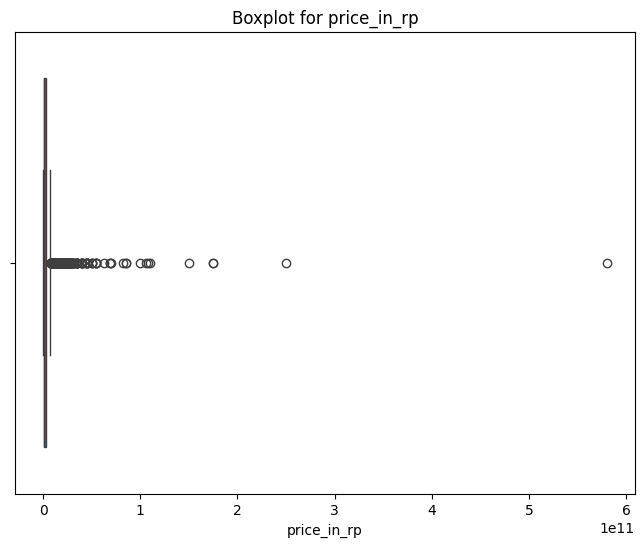

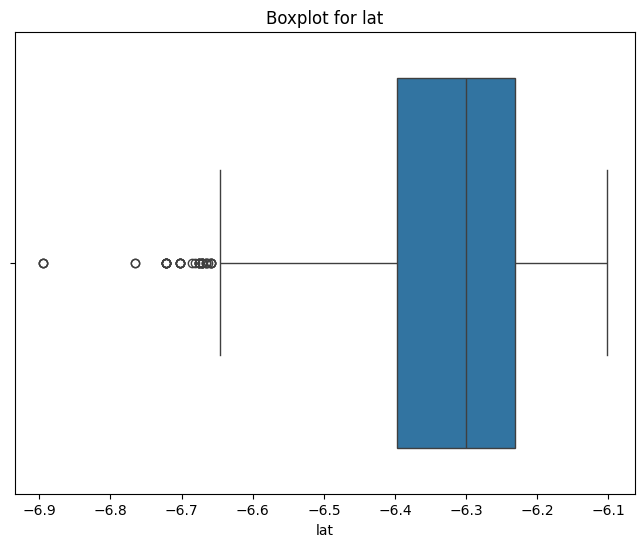

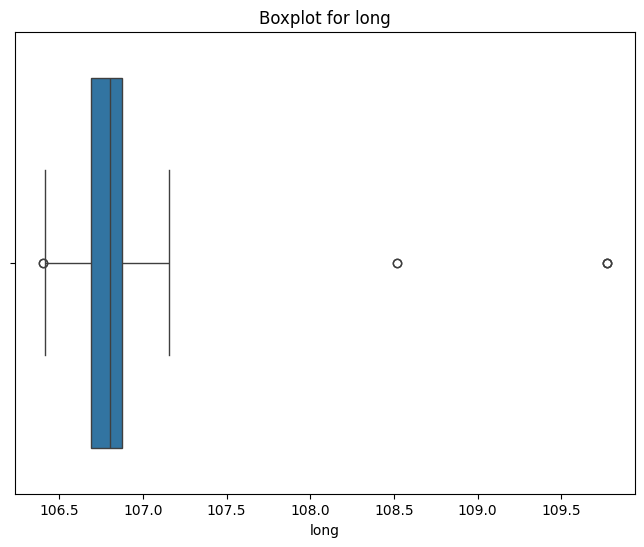

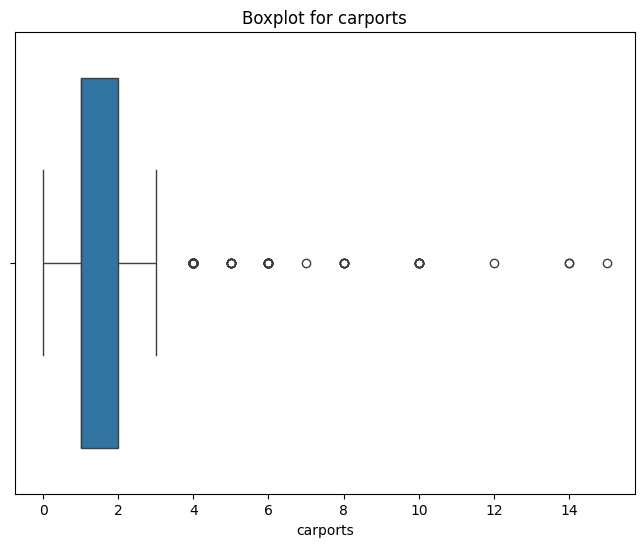

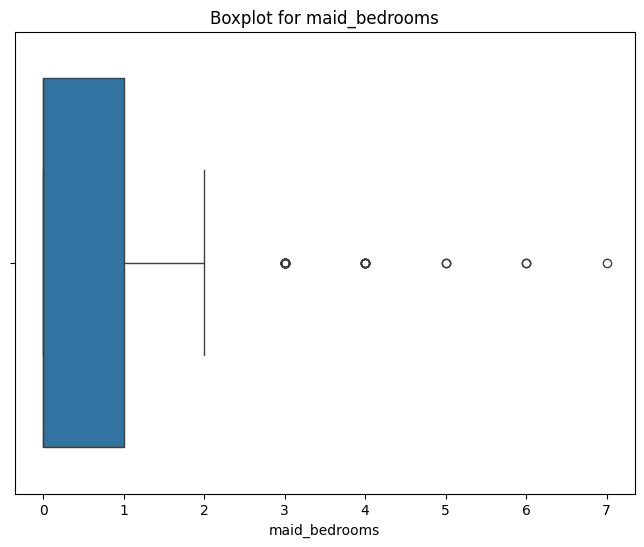

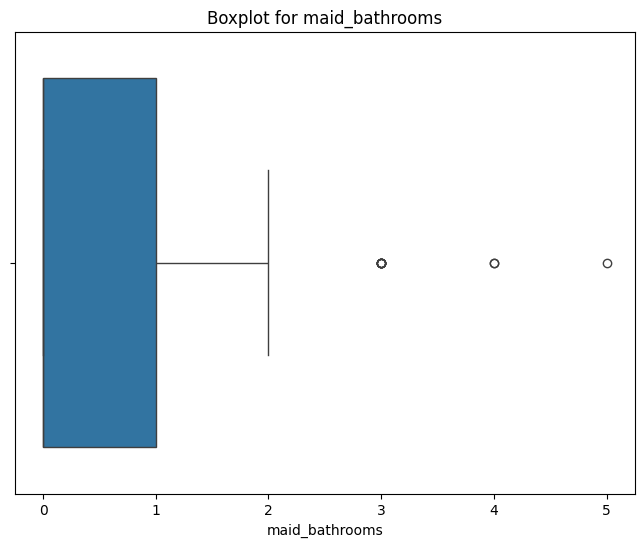

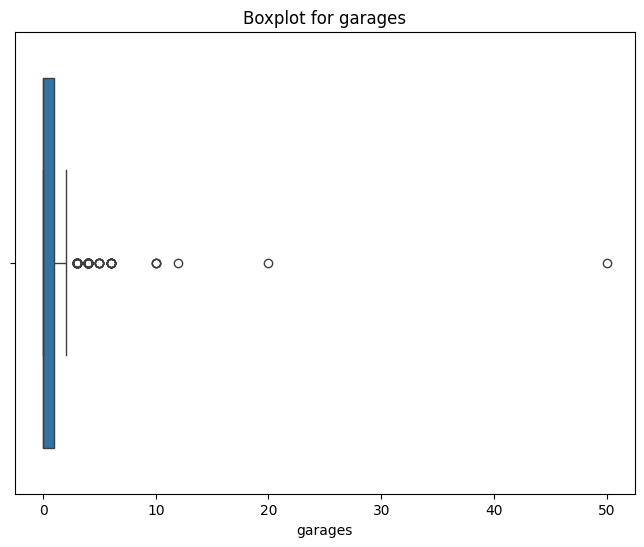

In [ ]:
# periksa outlier pada kolom numerik

import matplotlib.pyplot as plt

# Pilih kolom numerik yang ingin diperiksa
numerical_cols = data_cleaned.select_dtypes(include=np.number).columns

# Buat boxplot untuk setiap kolom numerik
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data_cleaned[col])
  plt.title(f"Boxplot for {col}")
  plt.show()

Terlihat bahwa terdapat beberapa outlier pada kolom-kolom di atas. Pada kasus ini, kita akan menghapus outlier menggunakan teknik Inter Quartile Range (IQR). IQR didefinisikan sebagai
* $IQR = Q3 - Q1$
* Batas Bawah = $Q1 - 1.5 * IQR$
* Batas Atas = $Q3 + 1.5 * IQR$

In [ ]:
numeric_columns = data_cleaned.select_dtypes(include = ["number"]).columns
# Calculate Q1, Q3, and IQR only for numeric columns
Q1 = data_cleaned[numeric_columns].quantile(0.25)
Q3 = data_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
# Filter the DataFrame based on the IQR
data_cleaned = data_cleaned[~((data_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) |
                    (data_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis = 1)]
data_cleaned.shape

(3076, 14)

Setelah outlier dihapus data tersisa 3076 baris dan 14 coulomns

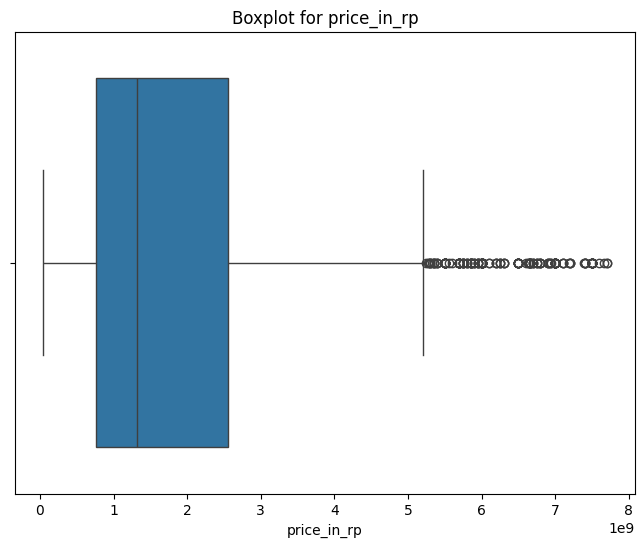

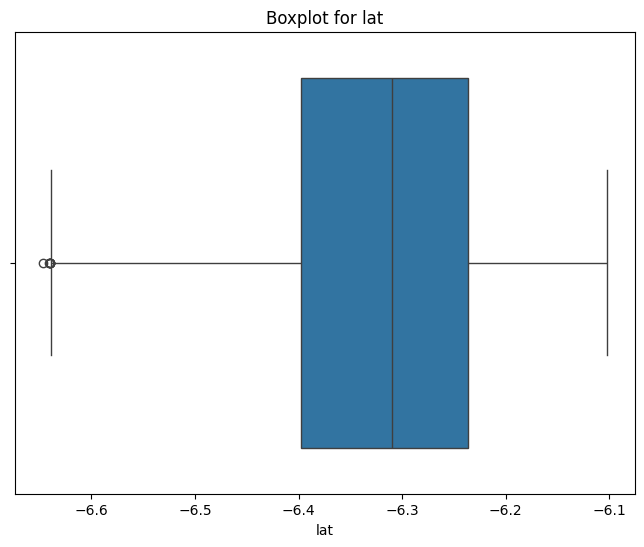

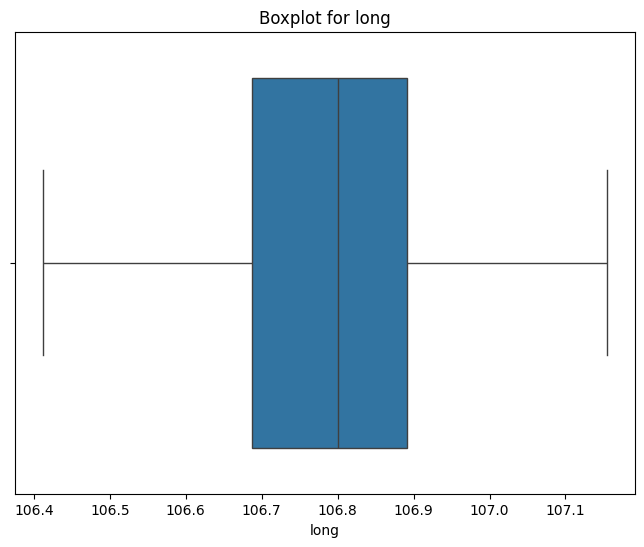

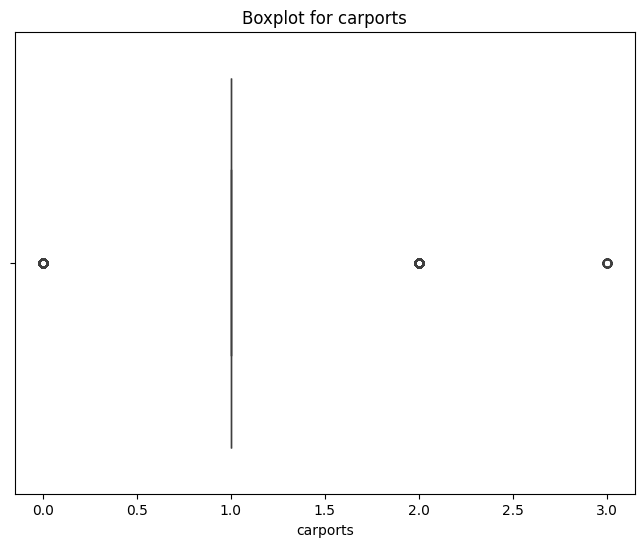

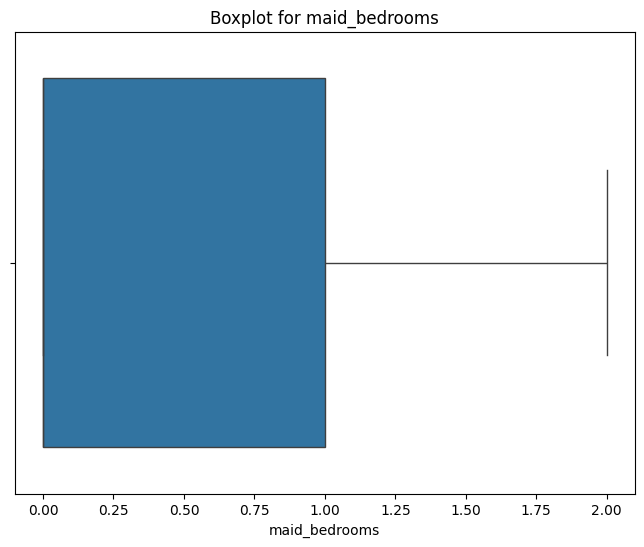

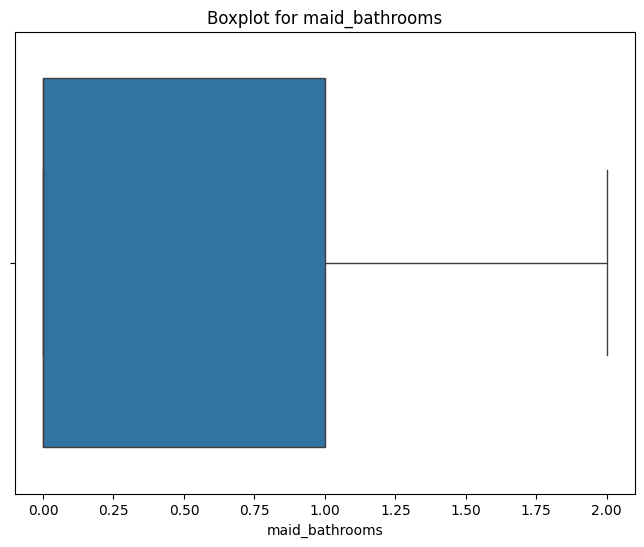

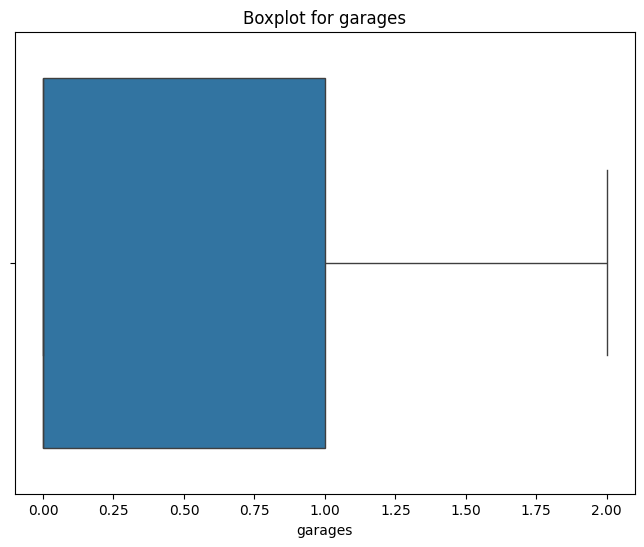

In [ ]:
# Pilih kolom numerik yang ingin diperiksa
numerical_cols = data_cleaned.select_dtypes(include=np.number).columns

# Buat boxplot untuk setiap kolom numerik
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data_cleaned[col])
  plt.title(f"Boxplot for {col}")
  plt.show()

Bisa Dilihat bahwa outlier yang ada sudah terhapus dengan metode IQR

## C. Memeriksa Data Duplikat

In [ ]:
# Menampilkan jumlah data duplikat
data_cleaned.duplicated().sum()

0

Berdasarkan hasil di atas, tidak terdapat data duplikat pada data

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3076 entries, 0 to 3552
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             3076 non-null   object 
 1   price_in_rp     3076 non-null   float64
 2   title           3076 non-null   object 
 3   address         3076 non-null   object 
 4   district        3076 non-null   object 
 5   city            3076 non-null   object 
 6   lat             3076 non-null   float64
 7   long            3076 non-null   float64
 8   facilities      3076 non-null   object 
 9   carports        3076 non-null   float64
 10  electricity     3076 non-null   object 
 11  maid_bedrooms   3076 non-null   float64
 12  maid_bathrooms  3076 non-null   float64
 13  garages         3076 non-null   float64
dtypes: float64(7), object(7)
memory usage: 360.5+ KB


Setelah melalui beberapa tahapan, data berjumlah 3076 baris dan 14 Fitur

# 6. Exploratory Data Analysis

## A. Univariate Analysis

In [ ]:
# Memisahkan kolom numerik dan kategorikal
numerical_cols = data_cleaned.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns.tolist()

print("Kolom Numerik:")
print(numerical_cols)
print("\nKolom Kategorikal:")
print(categorical_cols)

Kolom Numerik:
['price_in_rp', 'lat', 'long', 'carports', 'maid_bedrooms', 'maid_bathrooms', 'garages']

Kolom Kategorikal:
['url', 'title', 'address', 'district', 'city', 'facilities', 'electricity']


Bisa dilihat mengenai hasil pembagian fitur berdasarkan tipe data dari setiap Fitur

In [ ]:
# Membagi kolom-kolom menjadi kolom numerikal dan kolom kategorikal
numerical_features = ['price_in_rp', 'lat', 'long', 'carports', 'maid_bedrooms', 'maid_bathrooms', 'garages']
categorical_features = ['url', 'title', 'address', 'district', 'city', 'facilities', 'electricity']

In [ ]:
# Analisis Fitur district
feature = categorical_features[3]
count = data_cleaned[feature].value_counts()
percent = 100*data_cleaned[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(4)})
print(df)

                jumlah sampel  persentase
district                                 
Sentul City               228      7.4122
Gading Serpong             91      2.9584
Alam Sutera                90      2.9259
Harapan Indah              74      2.4057
Sawangan                   73      2.3732
...                       ...         ...
TB Simatupang               1      0.0325
Kramat Jati                 1      0.0325
Menteng Atas                1      0.0325
Kedoya Utara                1      0.0325
Sudimara                    1      0.0325

[340 rows x 2 columns]


Hasil analisis fitur district menunjukkan jumlah sampel dan presentase dari data wilayah administratif

Analisis Fitur Numerik

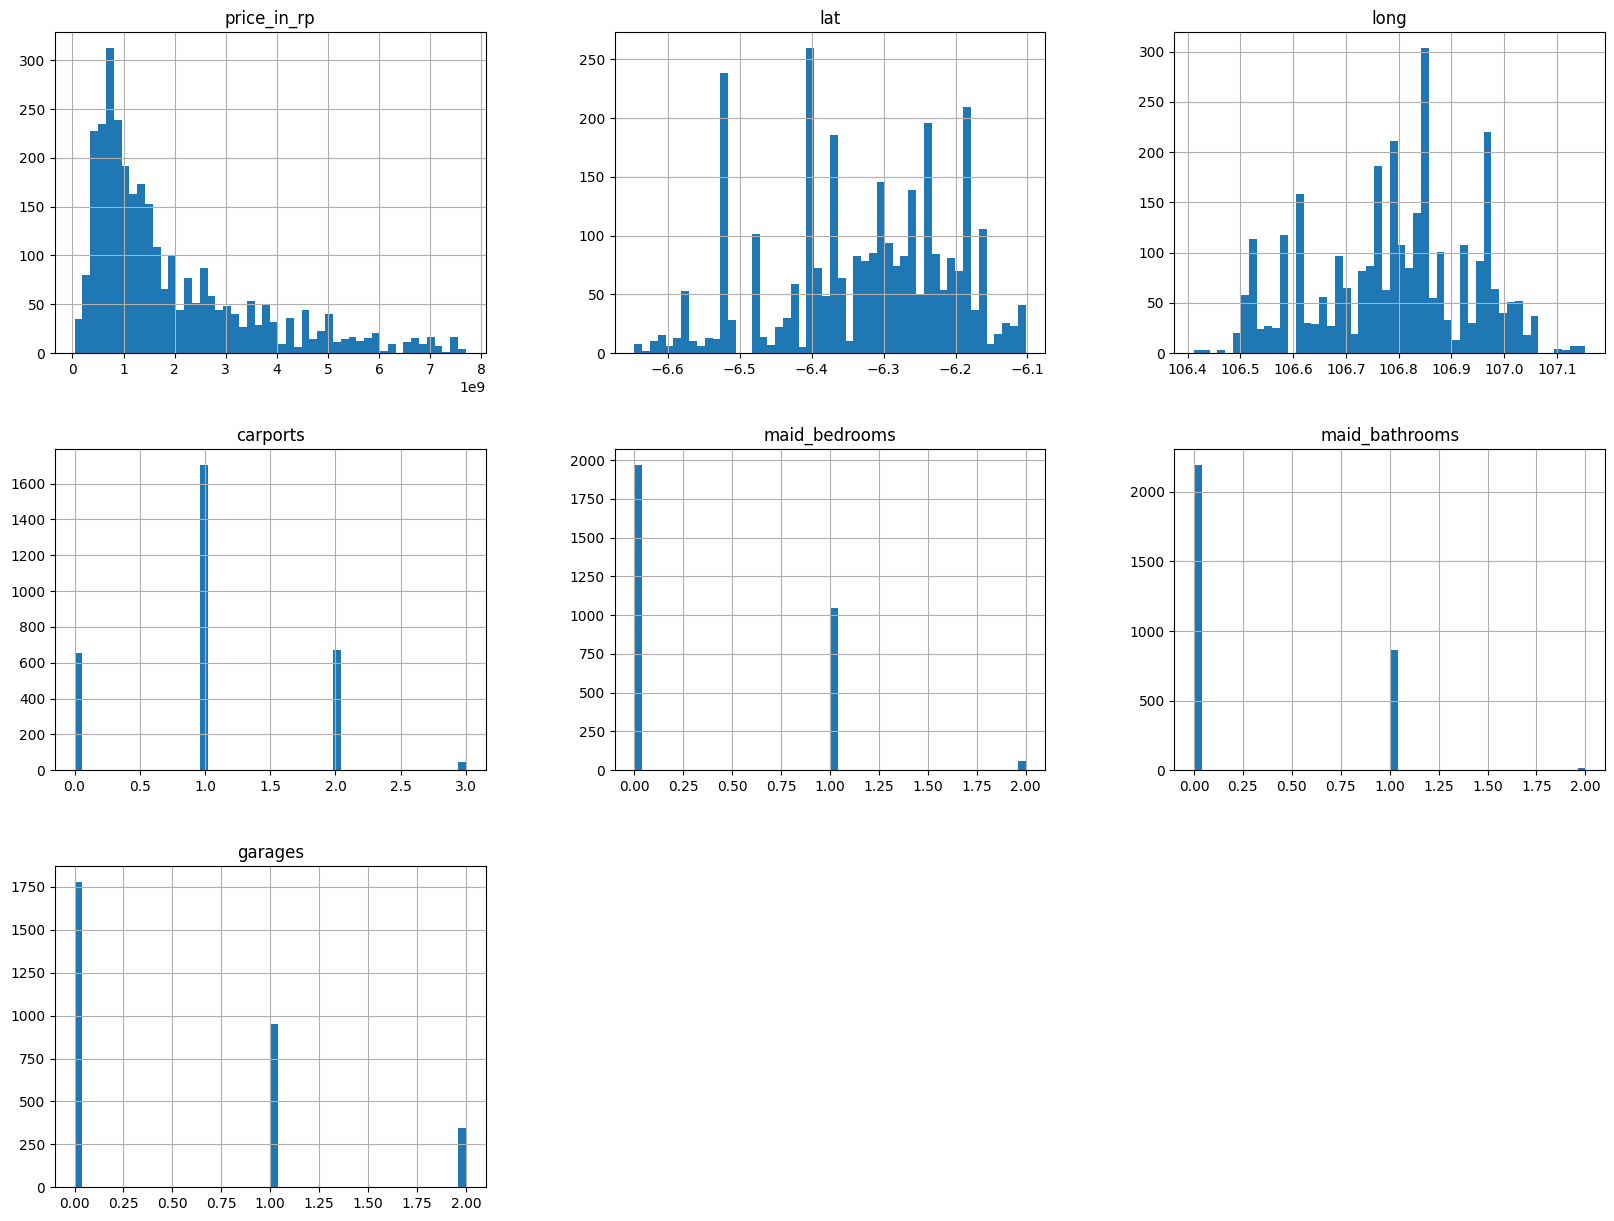

In [ ]:
# Numerical feature
data_cleaned.hist(bins = 50, figsize = (20, 15))
plt.show()

Dilihat dari histogram tersebut kita mendapatkan keterangan bahwa:

- price_in_rp: Histogram ini menunjukkan distribusi harga rumah dalam Rupiah. Sebagian besar harga rumah terkonsentrasi pada kisaran lebih rendah (sekitar di bawah 1 miliar), dengan semakin sedikit rumah yang memiliki harga di atas 2 miliar. Ini menunjukkan distribusi yang sangat condong ke kiri.

- lat (latitude): Fitur ini menunjukkan distribusi letak geografis rumah berdasarkan garis lintang. Distribusi latitude cukup merata, namun terdapat puncak pada beberapa nilai tertentu, yang mungkin menunjukkan lokasi rumah di area tertentu yang lebih padat.

- long (longitude): Fitur ini menunjukkan distribusi letak geografis rumah berdasarkan garis bujur. Histogramnya memperlihatkan variasi yang cukup merata, tetapi terdapat beberapa puncak pada titik tertentu, yang mungkin menunjukkan area yang lebih populer.

- carports: Fitur ini menunjukkan jumlah carport di setiap rumah. Mayoritas rumah memiliki 1 carport, diikuti oleh 0 dan 2 carport. Sangat sedikit rumah yang memiliki lebih dari 2 carport.

- maid_bedrooms: Histogram ini menunjukkan jumlah kamar tidur untuk pembantu di rumah. Sebagian besar rumah tidak memiliki kamar tidur untuk pembantu, dan beberapa memiliki 1 kamar tidur pembantu.

- maid_bathrooms: Fitur ini menunjukkan jumlah kamar mandi pembantu. Mayoritas rumah tidak memiliki kamar mandi khusus untuk pembantu, dan sebagian kecil memiliki 1 kamar mandi pembantu.

- garages: Histogram ini menunjukkan jumlah garasi di setiap rumah. Mayoritas rumah tidak memiliki garasi, dan sebagian kecil memiliki 1 atau 2 garasi.

Secara keseluruhan, hasil histogram ini memberikan gambaran distribusi setiap fitur numerik. Sebagian besar fitur menunjukkan distribusi yang sangat tidak merata atau terpusat pada nilai tertentu, yang bisa menjadi informasi penting dalam analisis dan prediksi harga rumah.

## B. Multivariate Analysis

In [ ]:
print(data_cleaned['price_in_rp'])

0       2.990000e+09
1       1.270000e+09
2       1.950000e+09
3       3.300000e+09
4       4.500000e+09
            ...     
3548    5.880000e+08
3549    7.850000e+08
3550    7.550000e+08
3551    8.000000e+08
3552    6.550000e+08
Name: price_in_rp, Length: 3076, dtype: float64


Bisa dilihat values dari kolom price_in_rp

+-----------------+------------------+
| City            | Average Price    |
|-----------------+------------------|
| Bekasi          | Rp 1,251,822,414 |
| Bogor           | Rp 1,583,212,160 |
| Depok           | Rp 1,247,827,853 |
| Jakarta Barat   | Rp 3,220,384,615 |
| Jakarta Pusat   | Rp 1,394,761,905 |
| Jakarta Selatan | Rp 3,498,706,422 |
| Jakarta Timur   | Rp 1,650,326,087 |
| Jakarta Utara   | Rp 4,347,363,636 |
| Tangerang       | Rp 2,489,591,700 |
+-----------------+------------------+


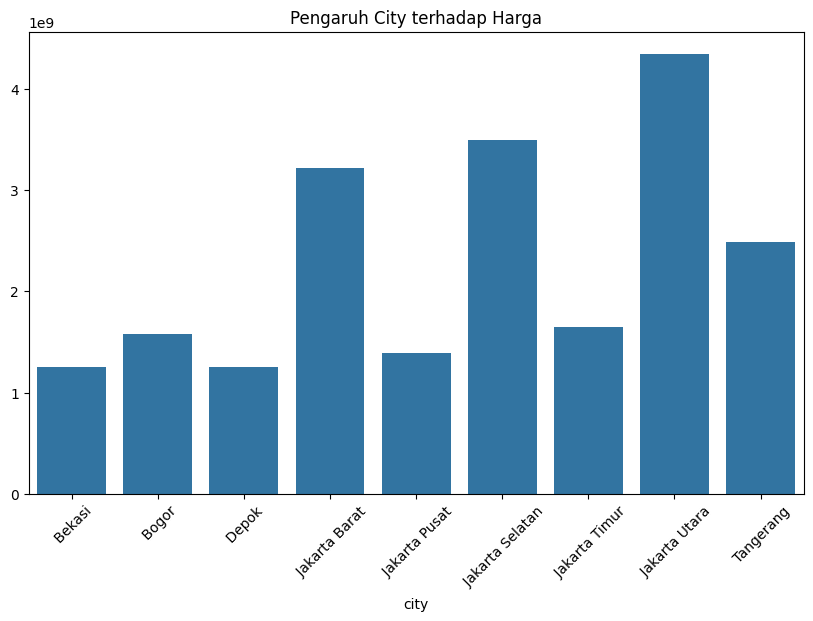

In [ ]:
# Menghitung rata-rata price_in_rp untuk setiap city
average_price_by_city = data_cleaned.groupby('city')['price_in_rp'].mean()

# Convert the Series to a list of lists for tabulate
average_price_by_city_list = [[city, "Rp {:,.0f} ".format(price)] for city, price in average_price_by_city.items()]

# Menampilkan hasil
print(tabulate(average_price_by_city_list, headers=['City', 'Average Price'], tablefmt='psql'))

# Membuat plot untuk memvisualisasikan pengaruh city terhadap harga
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_city.index, y=average_price_by_city.values)
plt.title('Pengaruh City terhadap Harga')
plt.xticks(rotation=45)
plt.show()

Jika dilihat barplot tersebut bisa kita simpulkan bahwa kota sangat mempengaruhi harga jual dari rummah dan perbedaan setiap harga rumah disetiap kota juga beberapa sangat signifikan

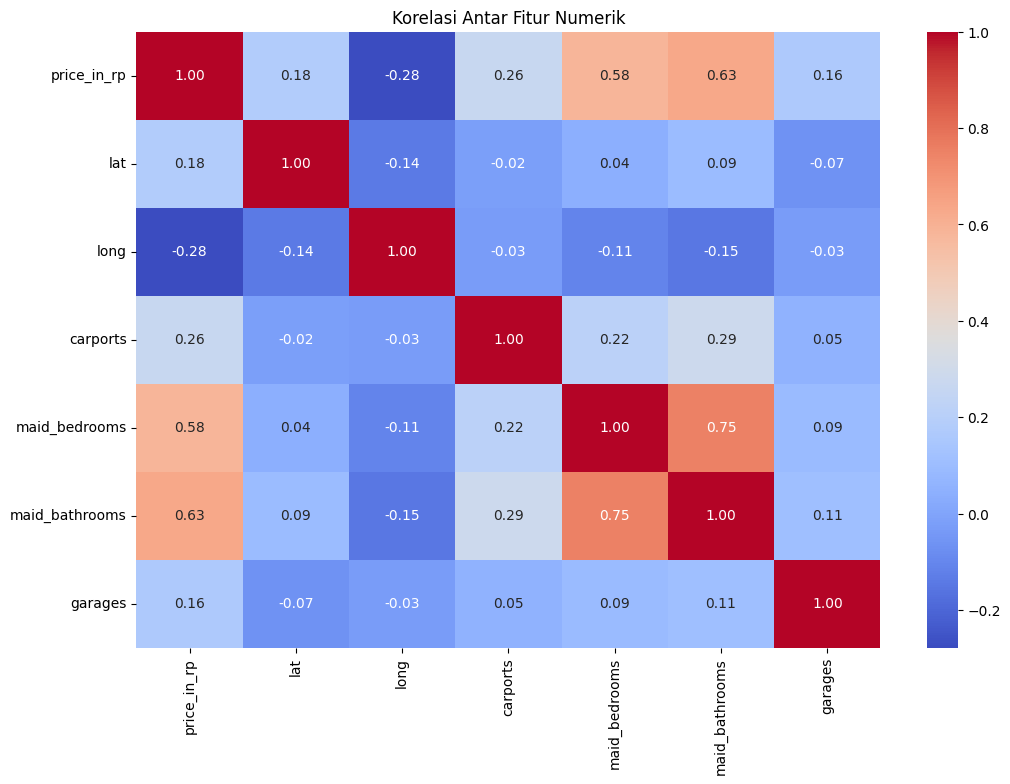

In [ ]:
# Heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation calculation
numerical_data = data_cleaned.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

Jika kita amati, fitur 'garages' memiliki skor korelasi yang kecil (0.16) dengan fitur target ‘price_in_rp’. Sehingga, fitur tersebut dapat di-drop.

# 7. Data Preparation

In [ ]:
data_cleaned.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,carports,electricity,maid_bedrooms,maid_bathrooms,garages
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",0.0,4400 mah,0.0,1.0,0.0
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,1.0,2200 mah,0.0,0.0,0.0
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",1.0,2200 mah,1.0,1.0,1.0
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",0.0,3500 mah,1.0,1.0,2.0
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",2.0,3500 mah,1.0,1.0,1.0


In [ ]:
data_cleaned.drop(['garages'], inplace=True, axis=1)
data_cleaned.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,carports,electricity,maid_bedrooms,maid_bathrooms
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",0.0,4400 mah,0.0,1.0
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,1.0,2200 mah,0.0,0.0
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",1.0,2200 mah,1.0,1.0
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",0.0,3500 mah,1.0,1.0
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",2.0,3500 mah,1.0,1.0


Dari hasil pembacaan 5 bari awal dari data kita sudah tidak ada kolom 'garages'

In [ ]:
# Encoding Fitur Kategori
cat_features = data_cleaned.select_dtypes(include='object').columns.to_list()
for feature in cat_features:
    dummies = pd.get_dummies(data_cleaned[feature], prefix=feature)
    data_cleaned = pd.concat([data_cleaned, dummies], axis=1)
data_cleaned.drop(cat_features, axis=1, inplace=True)
data_cleaned.head()

,price_in_rp,lat,long,carports,maid_bedrooms,maid_bathrooms,url_https://www.rumah123.com/properti/bekasi/hos10020571/#qid~28f37bc1-ecdd-40b0-9d22-cc1f698abc43,url_https://www.rumah123.com/properti/bekasi/hos10071393/#qid~0ecaa2ab-9cab-4ea6-bbbd-f9dddc119026,url_https://www.rumah123.com/properti/bekasi/hos10124177/#qid~2327913a-137c-4a9f-a3fe-15ca2e2ac48d,url_https://www.rumah123.com/properti/bekasi/hos10124197/#qid~05fa4e43-e888-4337-b04f-718e6b5a7975,...,electricity_3500 mah,electricity_4400 mah,electricity_450 mah,electricity_5500 mah,electricity_6600 mah,electricity_7600 mah,electricity_7700 mah,electricity_8000 mah,electricity_900 mah,electricity_lainnya mah
0,2.990000e+09,-6.223945,106.986275,0.0,0.0,1.0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1.270000e+09,-6.223945,106.986275,1.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.950000e+09,-6.223945,106.986275,1.0,1.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.300000e+09,-6.223945,106.986275,0.0,1.0,1.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,4.500000e+09,-6.223945,106.986275,2.0,1.0,1.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


Proses encoding fitur kategori menggunakan teknik one-hot-encoding. Teknik ini adalah salah satu metode dalam proses encoding fitur (feature encoding) pada data kategorikal. Tujuannya adalah untuk mengubah variabel kategorikal menjadi representasi biner yang dapat digunakan dalam algoritma pembelajaran mesin. Kita memiliki beberapa variabel kategori. Mari kita lakukan proses encoding ini dengan fitur get_dummies.

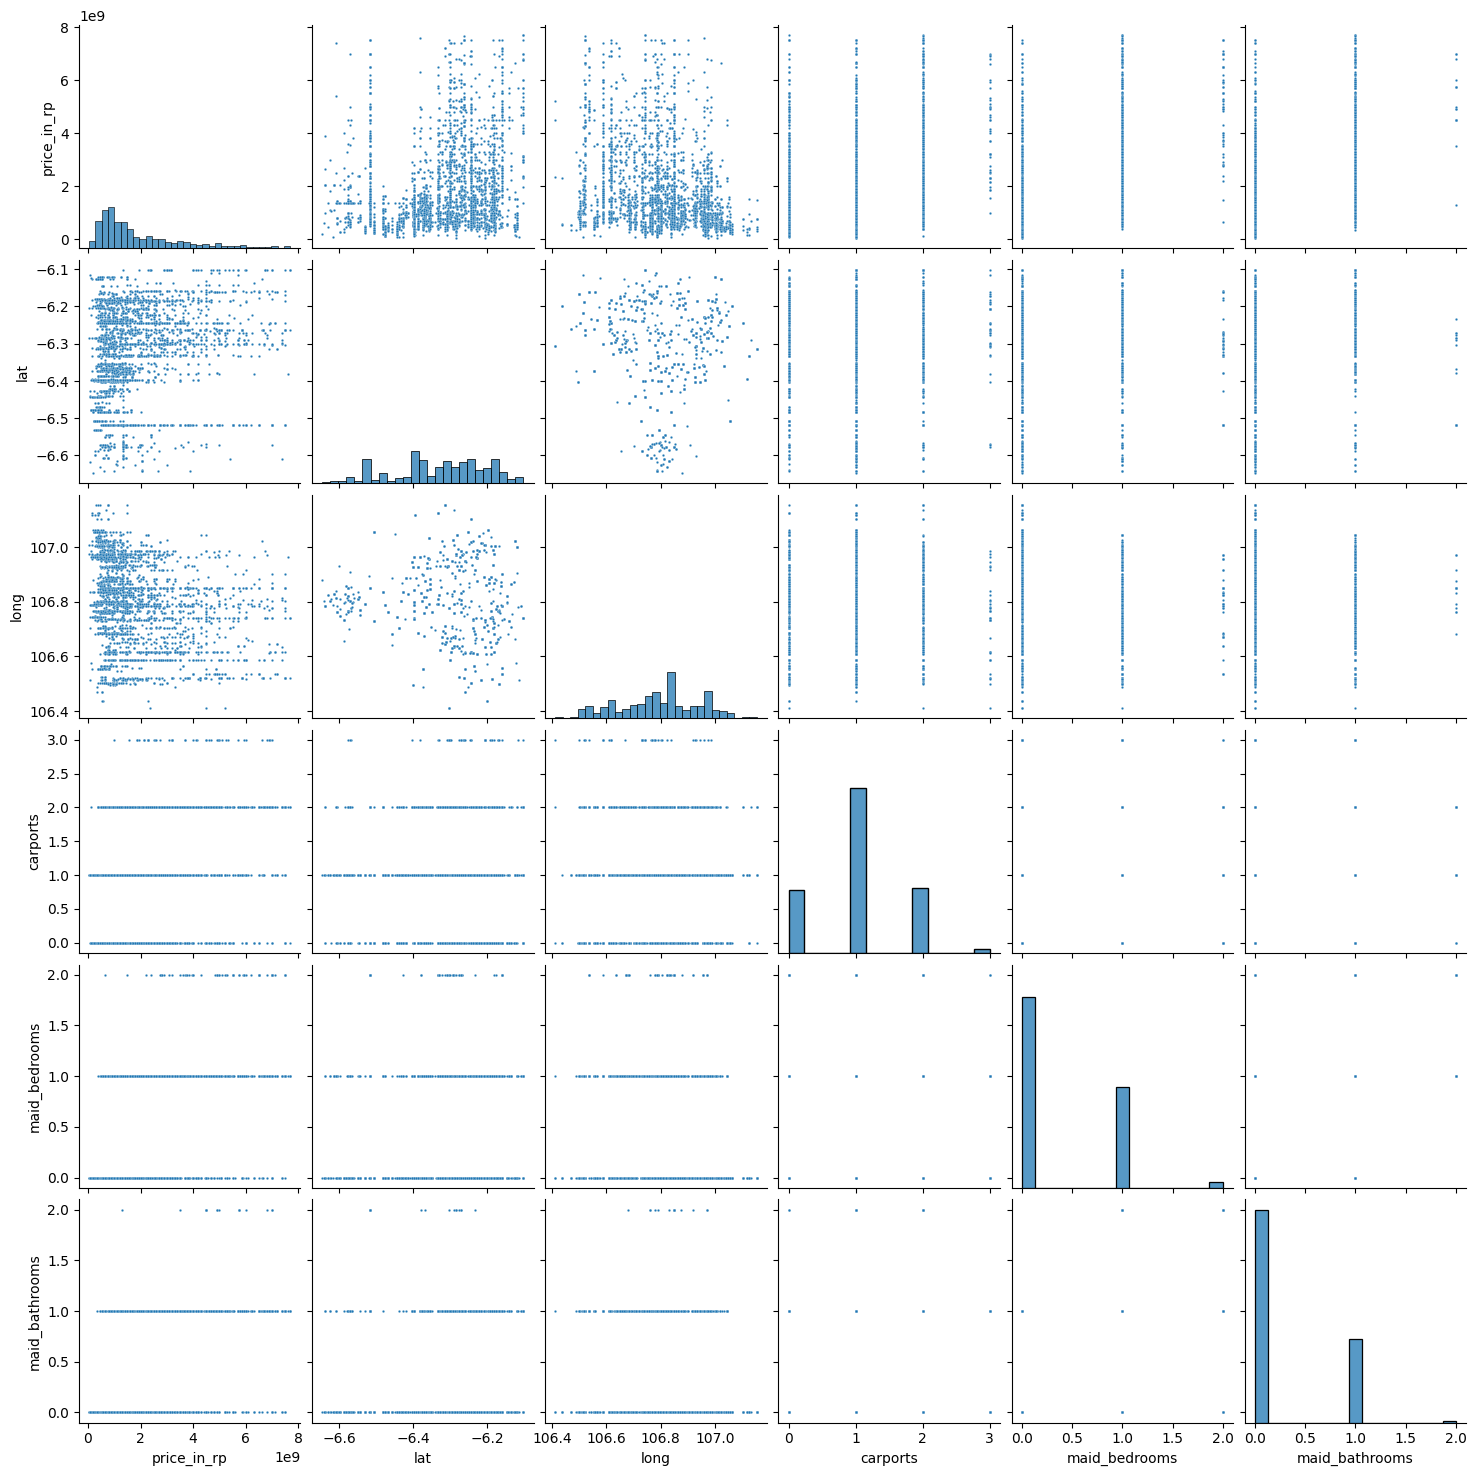

In [ ]:
numerical_features = numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64'])
sns.pairplot(data_cleaned[numerical_features.columns.tolist()], plot_kws={"s": 3})

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang digunakan pada proyek ini adalah PCA. PCA adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

PCA bekerja menggunakan metode aljabar linier. Ia mengasumsikan bahwa sekumpulan data pada arah dengan varians terbesar merupakan yang paling penting (utama). PCA umumnya digunakan ketika variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. Karena hal inilah, teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians dalam variabel asli. Sehingga, saat teknik PCA diterapkan pada data, ia hanya akan menggunakan komponen utama dan mengabaikan sisanya.

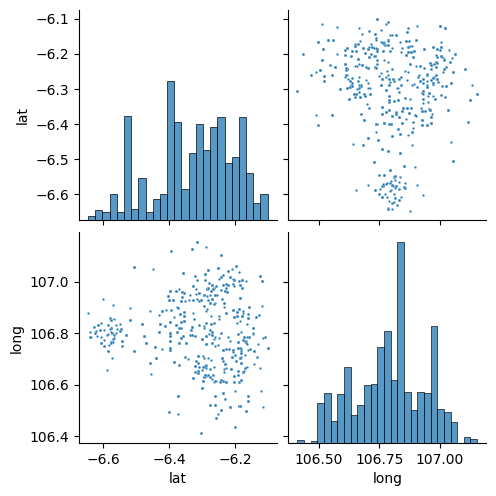

In [ ]:
sns.pairplot(data_cleaned[['lat', 'long']], plot_kws={"s": 3})

Berdasarkan dataframe fitur numerik dan pairplot, terdapat beberapa fitur yang akan dilakukan proses reduksi. Fitur lat dan long memiliki korelasi yang cukup tinggi. Hal ini terjadi karena fitur tersebut mengandung informasi yang sama yaitu koordinat lokasi.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(data_cleaned[['lat','long']])
princ_comp = pca.transform(data_cleaned[['lat','long']])

Kode di atas memanggil class PCA() dari library scikit-learn. Paremeter yang kita masukkan ke dalam class adalah n_components dan random_state. Parameter n_components merupakan jumlah komponen atau dimensi, dalam kasus kita jumlahnya ada 2, yaitu 'lat' dan 'long'.

Sedangkan, parameter random_state berfungsi untuk mengontrol random number generator yang digunakan. Parameter ini berupa bilangan integer dan nilainya bebas. Pada kasus ini, kita menerapkan random_state = 123. Berapa pun nilai integer yang kita tentukan (selama itu bilangan integer), ia akan memberikan hasil yang sama setiap kali dilakukan pemanggilan fungsi (dalam kasus kita, class PCA).

Setelah class PCA dibuat, kita bisa mengetahui proporsi informasi dari kedua komponen tersebut.

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.616, 0.384])

Arti dari output diatas adalah, 61,6% informasi pada kedua fitur 'GrLivArea' dan 'GarageArea' terdapat pada Principal Component (PC) pertama. Sedangkan sisanya, sebesar 3,84% terdapat pada PC kedua. Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran area menggantikan fitur 'lat' dan 'long'. Kita beri nama fitur ini 'dimension'.

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(data_cleaned[['lat','long']])
data_cleaned['dimension'] = pca.fit_transform(data_cleaned.loc[:, ('lat','long')]).flatten()
data_cleaned.drop(['lat','long'], axis=1, inplace=True)

In [ ]:
data_cleaned

,price_in_rp,carports,maid_bedrooms,maid_bathrooms,url_https://www.rumah123.com/properti/bekasi/hos10020571/#qid~28f37bc1-ecdd-40b0-9d22-cc1f698abc43,url_https://www.rumah123.com/properti/bekasi/hos10071393/#qid~0ecaa2ab-9cab-4ea6-bbbd-f9dddc119026,url_https://www.rumah123.com/properti/bekasi/hos10124177/#qid~2327913a-137c-4a9f-a3fe-15ca2e2ac48d,url_https://www.rumah123.com/properti/bekasi/hos10124197/#qid~05fa4e43-e888-4337-b04f-718e6b5a7975,url_https://www.rumah123.com/properti/bekasi/hos10157535/#qid~d0438ee0-b5a8-4689-9b29-0965c8765b83,url_https://www.rumah123.com/properti/bekasi/hos10162320/#qid~9e4aedac-e432-48b8-bf0d-a6ad052759eb,...,electricity_4400 mah,electricity_450 mah,electricity_5500 mah,electricity_6600 mah,electricity_7600 mah,electricity_7700 mah,electricity_8000 mah,electricity_900 mah,electricity_lainnya mah,dimension
0,2.990000e+09,0.0,0.0,1.0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0.150705
1,1.270000e+09,1.0,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.150705
2,1.950000e+09,1.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.150705
3,3.300000e+09,0.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.150705
4,4.500000e+09,2.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.150705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,5.880000e+08,1.0,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.093465
3549,7.850000e+08,1.0,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.160072
3550,7.550000e+08,1.0,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.160072
3551,8.000000e+08,2.0,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.132867


### Train-Test Split

Selanjutnya adalah membagi dataser menjadi data latih (train) dan data uji (test). Proses pembagian dataset menggunakan library sklearn yaitu train-test-split. Proporsi pembagian adalah 80:20. Tidak lupa juga kita akan memisahkan fitur dengan target (label) yaitu SalePrice.

In [ ]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop(["price_in_rp"],axis =1)
y = data_cleaned["price_in_rp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

Untuk mengecek jumlah sampel pada masing-masing bagian, kita gunakan code berikut.

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3076
Total # of sample in train dataset: 2460
Total # of sample in test dataset: 616


### Standarisasi

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn, StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carports', 'maid_bedrooms', 'maid_bathrooms']

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carports,maid_bedrooms,maid_bathrooms
1261,-0.053871,-0.720962,-0.62674
1286,1.371109,-0.720962,-0.62674
59,-0.053871,-0.720962,-0.62674
3236,-0.053871,-0.720962,-0.62674
523,1.371109,-0.720962,-0.62674


Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi, jalankan kode berikut

In [ ]:
X_train[numerical_features].describe().round(4)

,carports,maid_bedrooms,maid_bathrooms
count,2460.0000,2460.0000,2460.0000
mean,-0.0000,-0.0000,0.0000
std,1.0002,1.0002,1.0002
min,-1.4789,-0.7210,-0.6267
25%,-0.0539,-0.7210,-0.6267
50%,-0.0539,-0.7210,-0.6267
75%,-0.0539,1.2068,1.5236
max,2.7961,3.1346,3.6739


 Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1

  kita telah siap untuk dilatih menggunakan model machine learning

# 8. Model Development

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index = ["train_mse", "test_mse"],
                      columns = ["KNN", "RandomForest", "Boosting"])

## A. Model Development dengan K-Nearest Neighbor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc["train_mse","knn"] = mean_squared_error(y_pred = knn.predict(X_train), y_true = y_train)

## B. Model Development dengan Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators = 50, max_depth = 16, random_state = 55, n_jobs = -1)
RF.fit(X_train, y_train)
models.loc["train_mse", "RandomForest"] = mean_squared_error(y_pred = RF.predict(X_train), y_true = y_train)

## C. Model Development dengan Boosting Algorithm

In [ ]:
boosting = AdaBoostRegressor(learning_rate = 0.05, random_state = 55)
boosting.fit(X_train, y_train)
models.loc["train_mse", "Boosting"] = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)

# 9. Evaluasi Model

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata = 0 dan varians = 1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Untuk evaluasi, kita akan menggunakan *Mean Squared Error* (MSE). MSE dirumuskan sebagai
$$MSE = \frac{\Sigma (y_i - \hat{y_i})^2}{n}$$
dengan
* $y_i$: Nilai y sesungguhnya
* $\hat{y_i}$: Nilai y prediksi
* $n$: Jumlah data

Terkadang, evaluasi juga dapat menggunakan *Root Mean Squared Error* (RMSE). Standarnya, RMSE adalah akar dari MSE sehingga dapat dirumuskan
$$RMSE = \sqrt{MSE} = \sqrt{\frac{\Sigma (y_i - \hat{y_i})^2}{n}}$$

Selain itu, ada yang disebut dengan *Mean Absolute Error* (MAE). MAE dirumuskan sebagai
$$MAE = \frac{\Sigma |y_i - \hat{y_i|}}{n}$$

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {"KNN": knn, "RF": RF, "Boosting": boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, "train"] = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))
    mse.loc[name, "test"] = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))

# Panggil mse
mse

,train,test
KNN,759457136686991872.0,1030529178051947904.0
RF,259494600908571200.0,847564830124054144.0
Boosting,1080302630727024384.0,1040943033786082688.0


In [ ]:
# MSE dari scratch

def MSE(y_true, y_test):
    sum_error = 0.0
    # Convert pandas Series to numpy arrays to use positional indexing
    y_true_values = y_true.values
    y_test_values = y_test

    # Ensure y_test_values is a NumPy array
    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    # loop over all values using the length of the shorter array
    for i in range(min(len(y_true_values), len(y_test_values))):
        # the error is the sum of (y_true - prediction)^2
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += (prediction_error ** 2)
    # now normalize using the length of the shorter array
    mean_error = sum_error / float(min(len(y_true_values), len(y_test_values)))
    return mean_error

mse_2 = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    mse_2.loc[name, "train"] = MSE(y_train, model.predict(X_train))
    mse_2.loc[name, "test"] = MSE(y_test, model.predict(X_test))

mse_2

,train,test
KNN,759457136686995968.0,1030529178051948544.0
RF,259494600908570720.0,847564830124054400.0
Boosting,1080302630727024640.0,1040943033786082048.0


In [ ]:
# RMSE dari scratch

def RMSE(y_true, y_test):
    sum_error = 0.0
    # Convert pandas Series to numpy arrays to use positional indexing
    y_true_values = y_true.values
    y_test_values = y_test

    # Ensure y_test_values is a NumPy array
    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    # loop over all values using the length of the shorter array
    for i in range(min(len(y_true_values), len(y_test_values))):
        # the error is the sum of (y_true - prediction)^2
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += (prediction_error ** 2)
    # now normalize using the length of the shorter array
    mean_error = np.sqrt(sum_error / float(min(len(y_true_values), len(y_test_values))))
    return mean_error

rmse = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    rmse.loc[name, "train"] = RMSE(y_train, model.predict(X_train))
    rmse.loc[name, "test"] = RMSE(y_test, model.predict(X_test))

rmse

,train,test
KNN,871468379.625443,1015149830.346215
RF,509406125.707741,920632842.192833
Boosting,1039376077.619177,1020266158.306783


In [ ]:
# MAE dari scratch

def MAE(y_true, y_test):
    sum_error = 0.0
    # Convert pandas Series to numpy arrays to use positional indexing
    y_true_values = y_true.values
    y_test_values = y_test

    # Ensure y_test_values is a NumPy array
    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    # loop over all values using the length of the shorter array
    for i in range(min(len(y_true_values), len(y_test_values))):
        # the error is the sum of (y_true - prediction)^2
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += np.abs(prediction_error)
    # Now normalize using the length of the shorter array
    mean_error = sum_error / float(min(len(y_true_values), len(y_test_values)))
    return mean_error

mae = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    mae.loc[name, "train"] = MAE(y_train, model.predict(X_train))
    mae.loc[name, "test"] = MAE(y_test, model.predict(X_test))

mae

,train,test
KNN,561489308.943089,628507142.857143
RF,360691374.780781,551717830.323208
Boosting,732649795.691495,684348159.752652


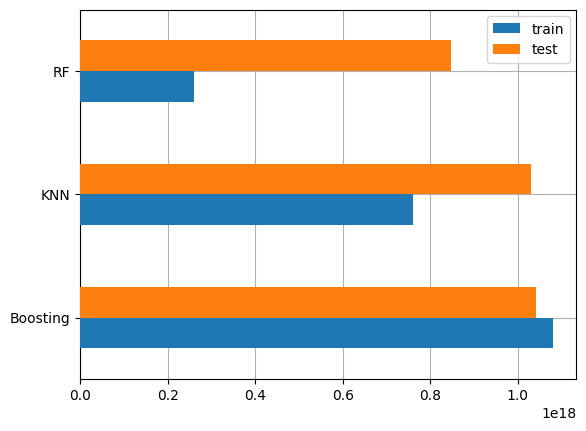

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by = "test", ascending = False).plot(kind = "barh", ax = ax, zorder = 3)
ax.grid(zorder = 0)



*   RF (Random Forest): MSE untuk data pelatihan lebih rendah daripada data pengujian, yang menunjukkan bahwa model Random Forest memiliki performa yang baik pada data pelatihan, namun kinerjanya sedikit menurun pada data pengujian. Perbedaan ini bisa mengindikasikan adanya overfitting, tetapi tidak terlalu signifikan.

*   KNN (K-Nearest Neighbors): Model KNN memiliki MSE yang lebih rendah pada data pelatihan dibandingkan dengan data pengujian. Perbedaan yang signifikan antara kedua nilai MSE ini menunjukkan bahwa model ini mungkin mengalami overfitting, di mana ia cocok dengan data pelatihan tetapi kurang akurat saat diaplikasikan pada data pengujian.

*   Boosting: Model Boosting memiliki MSE yang cukup besar baik pada data pelatihan maupun pengujian. Besarnya MSE pada data pelatihan menunjukkan bahwa model ini mungkin mengalami kesulitan dalam menangkap pola pada data, atau terdapat underfitting, di mana model terlalu sederhana untuk menangkap kompleksitas data.

Secara keseluruhan, model yang lebih ideal adalah yang memiliki MSE rendah baik pada data pelatihan maupun pengujian. Dari hasil ini, kita dapat melihat bahwa RF memiliki performa yang lebih baik dibandingkan KNN dan Boosting, namun masih ada kemungkinan model ini overfit

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
3137,960000000.0,1.173000e+09,954022231.8,703002012.1


Terlihat bahwa prediksi Random Forest (RF) memberikan hasil yang paling mendekati dengan y_true (data test). Dimana nilai y_true adalah 960000000.0 sedangkan nilai prediksi dari Random Forest adalah 954022231.8.